In [2]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import zipfile
import os

In [5]:
zip_file_path = 'C:/Users/Dell/Documents/My_repo/goit-KATRUSHENKO/HW6/data.zip'

extract_path = 'C:/Users/Dell/Documents/My_repo/goit-KATRUSHENKO/HW6/data/data'


In [6]:
data_dir = os.path.join(extract_path, 'data')

data_files = os.listdir(data_dir)
data_files

['data_2d.csv', 'mnist.csv']

In [7]:
data_2d_path = os.path.join(data_dir, 'data_2d.csv')
data_2d = pd.read_csv(data_2d_path)
data_2d.head()

,0.000000000000000000e+00,-7.687164597386728637e-01,4.608603078297135447e-01
0,0.0,2.687848,2.366961
1,0.0,-0.201379,0.470430
2,0.0,0.608496,1.225400
3,0.0,-0.082282,1.137218
4,0.0,2.083069,2.694482


In [11]:
X_2d = data_2d.values

In [12]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_2d)
    inertia.append(kmeans.inertia_)

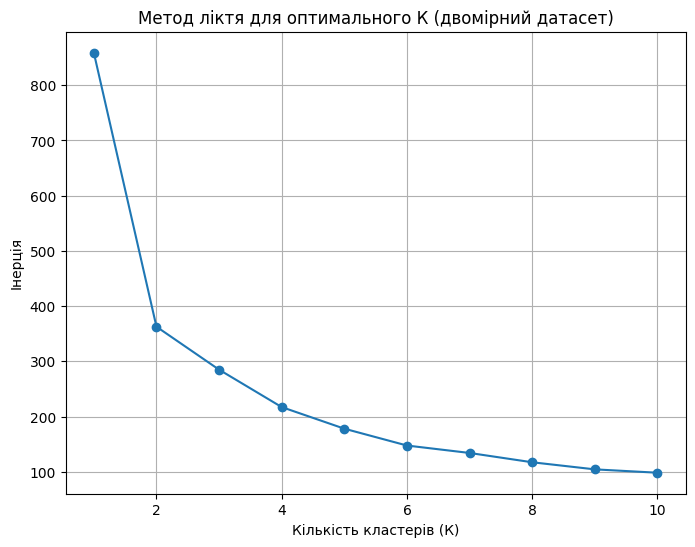

In [21]:
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Метод ліктя для оптимального К (двомірний датасет)')
plt.xlabel('Кількість кластерів (К)')
plt.ylabel('Інерція')
plt.grid(True)
plt.show()

In [22]:
mnist_data_path = os.path.join(data_dir, 'mnist.csv')
mnist_data = pd.read_csv(mnist_data_path)
mnist_data


,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.650,0.651,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
495,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
496,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
X_mnist = mnist_data.values

In [17]:
pca = PCA(n_components=2)
X_mnist_pca = pca.fit_transform(X_mnist)

In [18]:
inertia_mnist = []
K_range_2 = range(1, 11)

for k_2 in K_range_2:
    kmeans_2 = KMeans(n_clusters=k_2, random_state=42)
    kmeans_2.fit(X_mnist_pca)
    inertia_mnist.append(kmeans_2.inertia_)

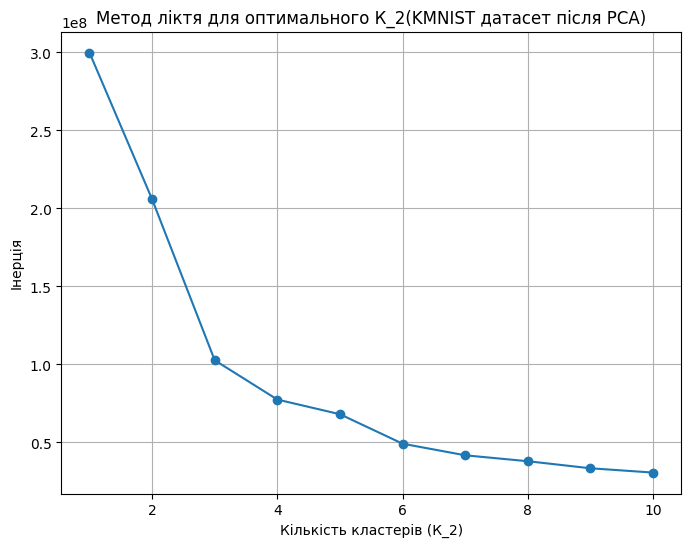

In [20]:
plt.figure(figsize=(8,6))
plt.plot(K_range_2, inertia_mnist, marker='o')
plt.title('Метод ліктя для оптимального К_2(KMNIST датасет після PCA)')
plt.xlabel('Кількість кластерів (К_2)')
plt.ylabel('Інерція')
plt.grid(True)
plt.show()

In [ ]:
Висновок

У цьому завданні було виконано кластеризацію даних за допомогою алгоритму K-means для двох різних наборів даних: двовимірного датасету та датасету MNIST.

 1. Двовимірний датасет:
 • Було використано метод ліктя для визначення оптимальної кількості кластерів. Графік показав точку “ліктя”, що свідчить про те, що після певної кількості кластерів подальше
збільшення не дає суттєвого покращення якості кластеризації.
 • Візуалізація показала розподіл даних по кластерах, що дозволяє зрозуміти їхню структуру та схожість між об’єктами.
 2. MNIST датасет:
 • Через високу розмірність даних спочатку було застосовано метод PCA для зменшення кількості вимірів до 2D. Це дозволило спростити кластеризацію та візуалізацію даних.
 • Метод ліктя також вказав на оптимальну кількість кластерів, після чого було виконано K-means. Візуалізація дозволила побачити, як дані MNIST розподіляються по кластерах після зменшення розмірності.

В цілому, завдання продемонструвало ефективність методів кластеризації та зменшення розмірності для виявлення структури даних та візуалізації результатів. 
Застосування методу ліктя допомогло знайти оптимальну кількість кластерів для кожного набору даних.